In [ ]:
!pip install metaseg
#Successfully installed black-21.7b0 click-8.0.4 coloredlogs-15.0.1 flake8-3.9.2 humanfriendly-10.0 isort-5.9.2 mccabe-0.6.1 metaseg-0.3.1 mypy-extensions-1.0.0 onnxruntime-1.14.1 pathspec-0.11.1 pycodestyle-2.7.0 pyflakes-2.3.1 tomli-1.2.3

In [2]:
!wget "https://cdn.pixabay.com/photo/2021/02/12/02/01/rosebud-6006985_1280.jpg"

--2023-04-09 04:44:02--  https://cdn.pixabay.com/photo/2021/02/12/02/01/rosebud-6006985_1280.jpg
Resolving cdn.pixabay.com (cdn.pixabay.com)... 104.18.15.16, 104.18.14.16, 2606:4700::6812:e10, ...
Connecting to cdn.pixabay.com (cdn.pixabay.com)|104.18.15.16|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 145013 (142K) [binary/octet-stream]
Saving to: ‘rosebud-6006985_1280.jpg’

rosebud-6006985_128 100%[===================>] 141.61K  --.-KB/s    in 0.002s  

2023-04-09 04:44:03 (57.9 MB/s) - ‘rosebud-6006985_1280.jpg’ saved [145013/145013]



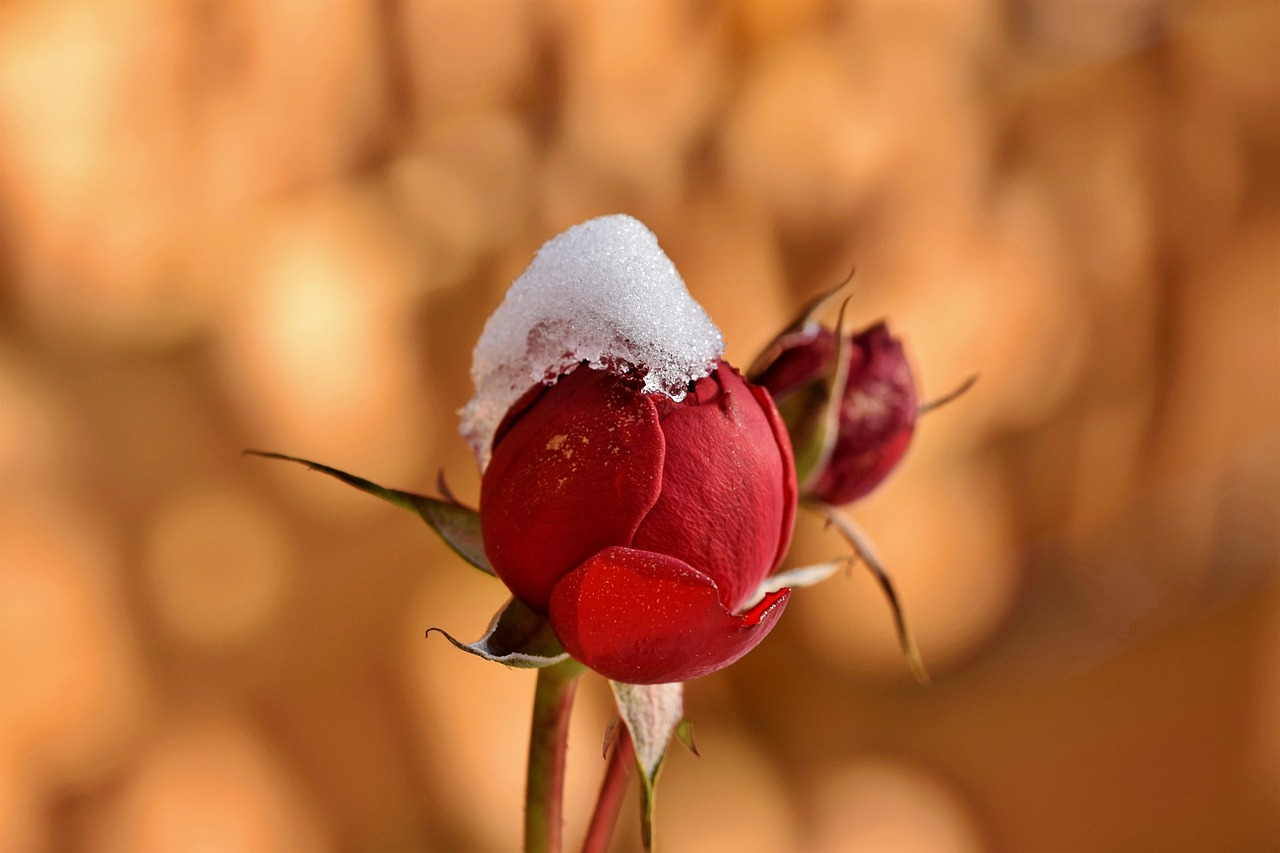

In [6]:
from IPython.display import Image
Image(filename='rosebud-6006985_1280.jpg')

In [3]:
from metaseg import SegAutoMaskGenerator

autoseg_image = SegAutoMaskGenerator().save_image(
    source="/content/rosebud-6006985_1280.jpg",
    model_type="vit_l",
    points_per_side=8, 
    points_per_batch=32,
    min_area=0,
)

vit_l model has been successfully downloaded and saved as 'vit_l.pth'.


In [4]:
autoseg_image

'output.jpg'

In [ ]:
type(autoseg_image)

str

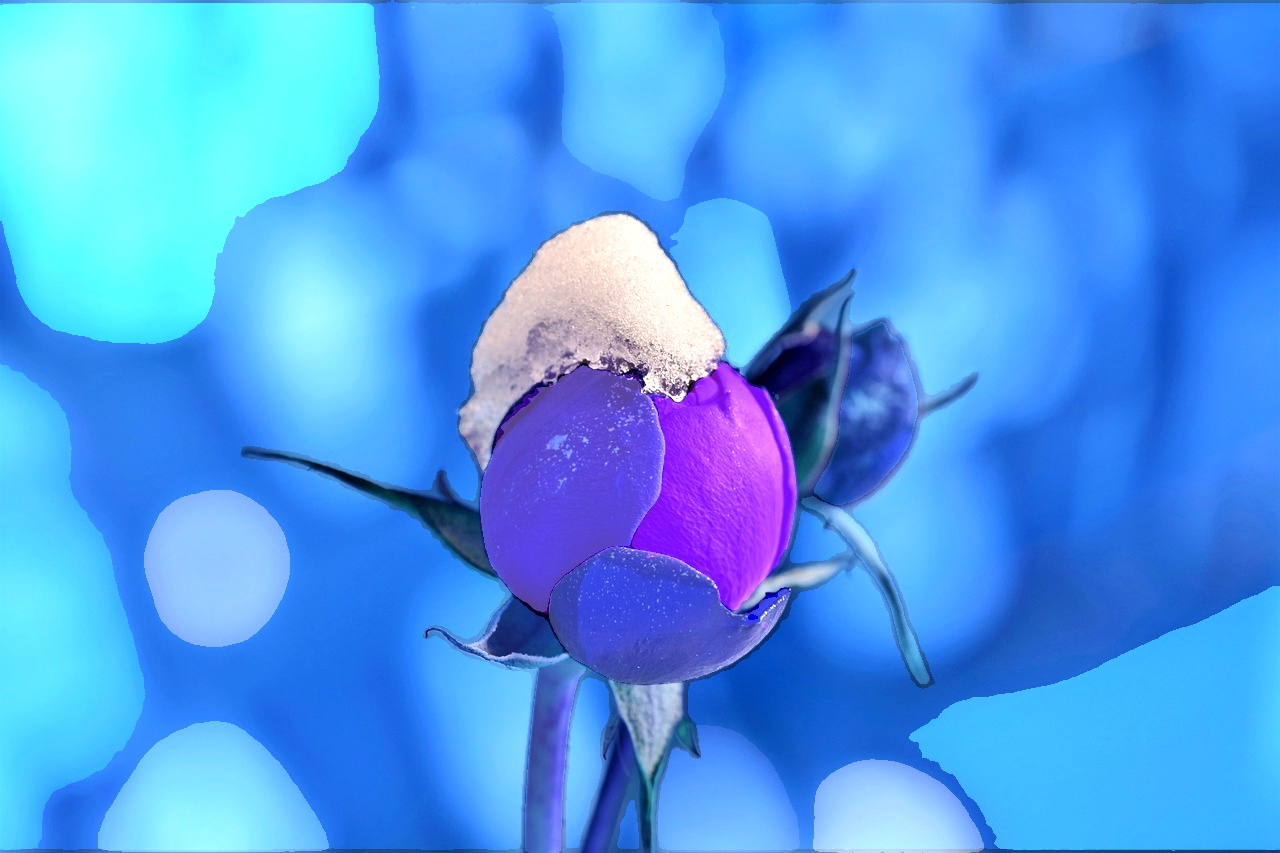

In [ ]:
from IPython.display import Image
Image(filename='output.jpg') 

In [ ]:
!pip install git+https://github.com/facebookresearch/segment-anything.git

In [8]:
from segment_anything import SamPredictor, sam_model_registry, SamAutomaticMaskGenerator

In [9]:
sam = sam_model_registry["vit_l"](checkpoint="/content/vit_l.pth")

In [10]:
mask_generator = SamAutomaticMaskGenerator(sam)

In [11]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2

In [12]:
image = cv2.imread('/content/rosebud-6006985_1280.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [13]:
masks = mask_generator.generate(image)

In [16]:
masks

[{'segmentation': array([[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False]]),
  'area': 899526,
  'bbox': [0, 0, 1279, 849],
  'predicted_iou': 1.0411847829818726,
  'point_coords': [[980.0, 679.734375]],
  'stability_score': 0.9867272973060608,
  'crop_box': [0, 0, 1280, 853]},
 {'segmentation': array([[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False]]),
  'area': 32536,
  'bbox': [459, 214, 

https://replicate.com/pablodawson/segment-anything-automatic/api

https://replicate.com/facebookresearch/mask2former/api

In [ ]:
!pip install replicate langchain

In [15]:
import os

os.environ['REPLICATE_API_TOKEN']='8d8515f51836505f328321757676e74ba7593e71'

In [17]:
import replicate
output = replicate.run(
    "pablodawson/segment-anything-automatic:14fbb04535964b3d0c7fad03bb4ed272130f15b956cbedb7b2f20b5b8a2dbaa0",
    input={"image": open("/content/rosebud-6006985_1280.jpg", "rb")}
)

In [18]:
output

'https://replicate.delivery/pbxt/el0mueG60cuGAEyRaz3yu2lQ3fGgDT8PXDRU4HWoKfaxxffLE/output_mask.png'

In [21]:
!wget https://replicate.delivery/pbxt/el0mueG60cuGAEyRaz3yu2lQ3fGgDT8PXDRU4HWoKfaxxffLE/output_mask.png

--2023-04-09 05:29:24--  https://replicate.delivery/pbxt/el0mueG60cuGAEyRaz3yu2lQ3fGgDT8PXDRU4HWoKfaxxffLE/output_mask.png
Resolving replicate.delivery (replicate.delivery)... 104.26.13.87, 172.67.71.67, 104.26.12.87, ...
Connecting to replicate.delivery (replicate.delivery)|104.26.13.87|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 39000 (38K) [image/png]
Saving to: ‘output_mask.png’

output_mask.png     100%[===================>]  38.09K  --.-KB/s    in 0s      

2023-04-09 05:29:24 (174 MB/s) - ‘output_mask.png’ saved [39000/39000]



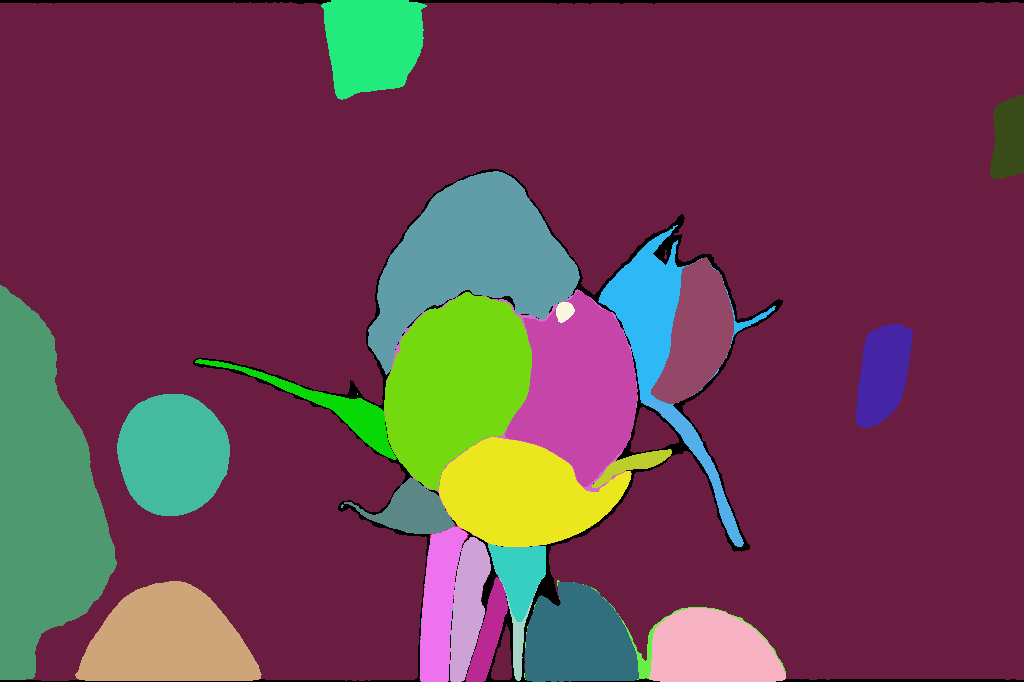

In [22]:
from IPython.display import Image
Image(filename='output_mask.png')

In [24]:
from langchain.llms import Replicate
from langchain import PromptTemplate, LLMChain

In [25]:
text2image = Replicate(model="stability-ai/stable-diffusion:db21e45d3f7023abc2a46ee38a23973f6dce16bb082a930b0c49861f96d1e5bf", 
                       input={'image_dimensions': '512x512'})

In [ ]:
image_output = text2image("A king kong riding a motorcycle by Picasso")
image_output

In [ ]:
!wget https://replicate.delivery/pbxt/pCCKXV6PGG7eJCGp6Q5Uws5wHHl6pLpEQ5zsl7YCHlpeAAwQA/out-0.png

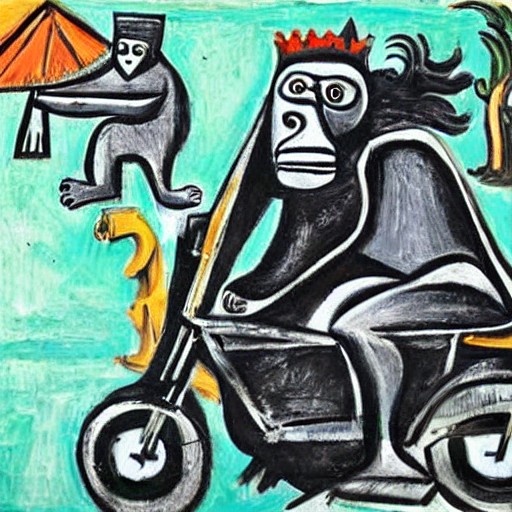

In [30]:
from IPython.display import Image
Image(filename='out-0.png')